<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()
df = pd.read_csv(file_path)
print (df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [ ]:
# Separate features and labels
X1 = df.values[:, 0]  # get input values from the first column for X1
X2 = df.values[:, 1]  # get input values from the second column for X2
X3 = df.values[:, 2]  # get input values from the third column for X3
y = df.values[:, 3]   # get output values from the fourth column for y
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

# Display first 5 records of each feature and the total number of training examples
print('X1 = ', X1[:5])
print('X2 = ', X2[:5])
print('X3 = ', X3[:5])
print('y = ', y[:5])
print('m = ', m)
print('n = ', n)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [ ]:
from IPython.display import display
display(df)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


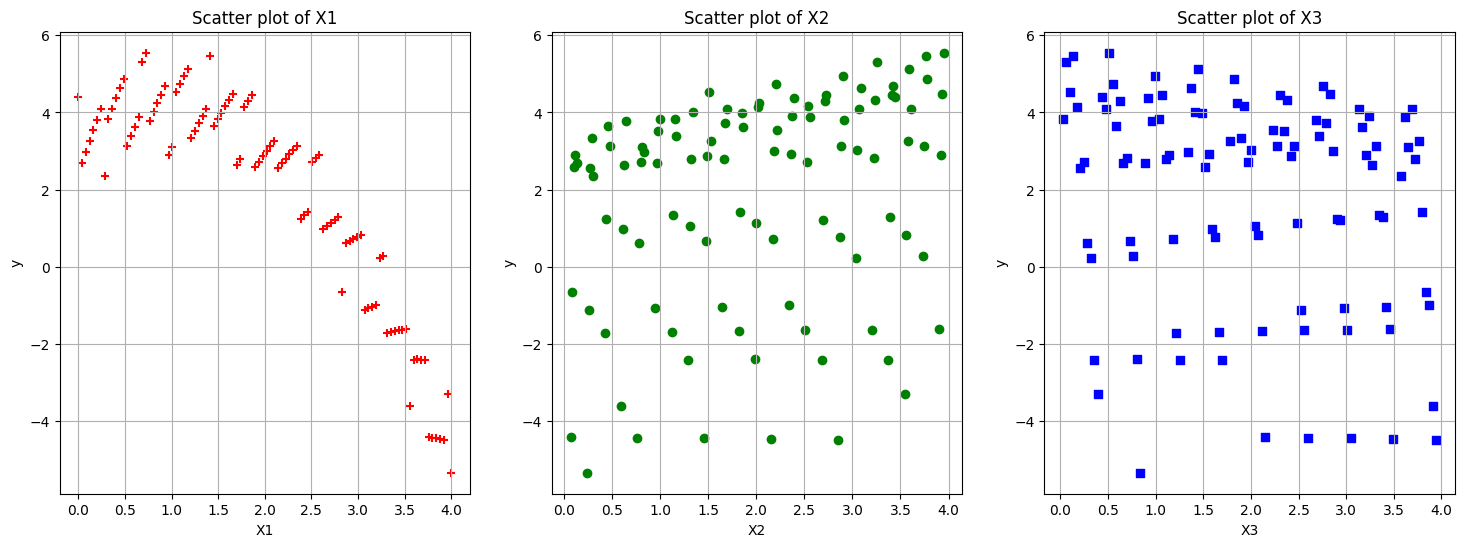

In [ ]:
# Separate features (X1, X2, X3) and labels (y)
X1 = df.values[:, 0]  # get input values from the first column for X1
X2 = df.values[:, 1]  # get input values from the second column for X2
X3 = df.values[:, 2]  # get input values from the third column for X3
y = df.values[:, 3]   # get output values from the fourth column for y

# Create separate scatter plots for X1, X2, and X3
plt.figure(figsize=(18, 6))

# Scatter plot for X1
plt.subplot(131)
plt.scatter(X1, y, color='red', marker='+')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Scatter plot of X1')

# Scatter plot for X2
plt.subplot(132)
plt.scatter(X2, y, color='green', marker='o')
plt.grid(True)
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Scatter plot of X2')

# Scatter plot for X3
plt.subplot(133)
plt.scatter(X3, y, color='blue', marker='s')
plt.grid(True)
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Scatter plot of X3')

# Show the plots
plt.show()

In [ ]:
X_0 = np.ones((m, 1))
X_0[:5]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_1[:10]
X_2[:10]
X_3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1, X_2, X_3))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [ ]:
theta1 = np.zeros(4)
theta2 = np.zeros(4)
theta1 = np.array(theta1)
theta2 = np.array(theta2)

In [ ]:
def compute_cost(X, y, theta1, theta2):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost

    """
    m = len(y)  # Number of training examples

    # Compute the cost for theta1
    predictions1 = X.dot(theta1.reshape(-1, 1))  # Reshape theta1 to (n, 1)
    errors1 = np.subtract(predictions1, y)
    sqrErrors1 = np.square(errors1)
    J1 = 1 / (2 * m) * np.sum(sqrErrors1)

    # Compute the cost for theta2
    predictions2 = X.dot(theta2.reshape(-1, 1))  # Reshape theta2 to (n, 1)
    errors2 = np.subtract(predictions2, y)
    sqrErrors2 = np.square(errors2)
    J2 = 1 / (2 * m) * np.sum(sqrErrors2)

    return J1, J2

# Example usage:
cost1, cost2 = compute_cost(X, y, theta1, theta2)
print('The cost for theta1 =', cost1)
print('The cost for theta2 =', cost2)


The cost for theta1 = 552.4438459196241
The cost for theta2 = 552.4438459196241


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta1, theta2)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [ ]:
theta1 = [0., 0.]
iterations = 1500
alpha = 0.1

In [ ]:
theta1, cost_history1 = gradient_descent(X, y, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history1)

ValueError: ignored

In [ ]:
theta2 = [0., 0.]
iterations = 1500
alpha = 0.01

In [ ]:
theta2, cost_history2 = gradient_descent(X, y, theta2, alpha, iterations)
print('Final value of theta =', theta2)
print('cost_history =', cost_history2)

ValueError: ignored